PyMC3 Test
>[https://pymc-devs.github.io/pymc3/getting_started/]

> followed by 1st example in the tutorial

 [-----------------100%-----------------] 2000 of 2000 complete in 13.6 sec{'sigma_log': array(0.11928766341575864), 'beta': array([ 1.00546456,  2.01092912]), 'alpha': array(1.0133190496853337)}


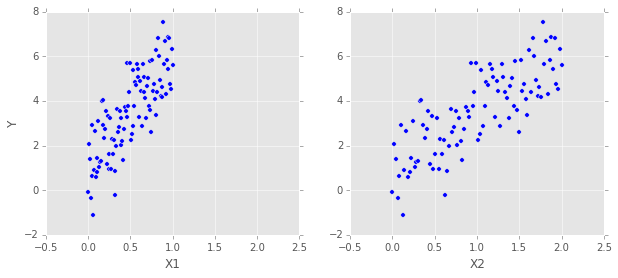

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)



# initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2,5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0, 2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

# pylab inline
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[1].set_xlabel('X2')



# Model Specification
from pymc3 import Model, Normal, HalfNormal
from pymc3 import NUTS, sample
from pymc3 import Slice
from pymc3 import Metropolis
from pymc3 import find_MAP
from scipy import optimize

basic_model = Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # Likelihood(sampling distribution) of observation
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)
    
    # draw 2000 posterior samples
    step = NUTS()
    trace = sample(2000, step=step, start=start)


'''
with basic_model:
    start = find_MAP(optimize.fmin_powell)
    trace = sample(2000, start=start)
''' 

map_estimate = find_MAP(model=basic_model) #Using BFGS optimization algorithm
print(map_estimate)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018CB44A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000027620BE0>]], dtype=object)

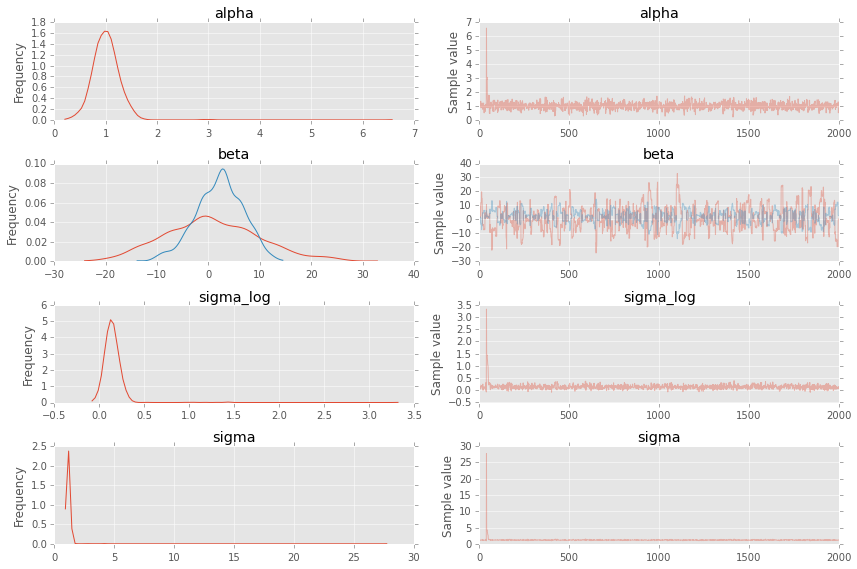

In [52]:
from pymc3 import traceplot
traceplot(trace[:])

In [33]:
from pymc3 import summary

summary(trace[:])


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.015            0.064            0.002            [0.898, 1.155]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.888          0.974          1.013          1.056          1.147


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.445            7.934            0.509            [-12.788, 16.097]
  1.223            3.965            0.254            [-5.598, 8.837]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -13.665        -3.006         2.165          9.036          16.035
  -5.542         -2.086         1.3

In [54]:
np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

n = 100
h = 61
alpha = 2
beta = 2

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.NUTS() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

 [-----------------100%-----------------] 1000 of 1000 complete in 0.3 sec

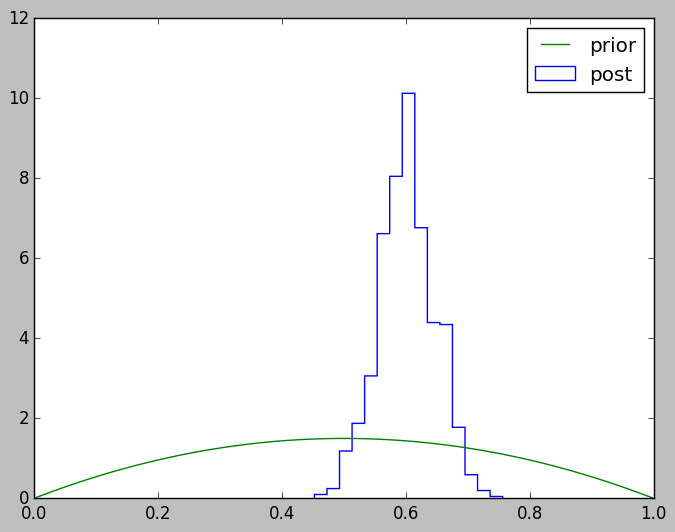

In [61]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#plt.style.use('fivethirtyeight')

plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

In [53]:
plt.style.available

['grayscale', 'fivethirtyeight', 'ggplot', 'bmh', 'dark_background']